## Problem Statement:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The "HeartDisease" column contains our label.

### Data Overview

----
-----
Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Feature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Age</td>
      <td>age of the patient [years]</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Sex</td>
      <td>sex of the patient [M: Male, F: Female]</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ChestPainType</td>
      <td>chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</td>
    </tr>
    <tr>
      <th>3</th>
      <td>RestingBP</td>
      <td>resting blood pressure [mm Hg]</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Cholesterol</td>
      <td>serum cholesterol [mm/dl]</td>
    </tr>
    <tr>
      <th>5</th>
      <td>FastingBS</td>
      <td>fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</td>
    </tr>
    <tr>
      <th>6</th>
      <td>RestingRCG</td>
      <td>resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</td>
    </tr>
    <tr>
      <th>7</th>
      <td>MaxHR</td>
      <td>maximum heart rate achieved [Numeric value between 60 and 202]</td>
    </tr>
    <tr>
      <th>8</th>
      <td>ExerciseAngina</td>
      <td>exercise-induced angina [Y: Yes, N: No]</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Oldpeak</td>
      <td>ST [Numeric value measured in depression]</td>
    </tr>
    <tr>
      <th>10</th>
      <td>ST_Slope</td>
      <td>the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</td>
    </tr>
    <tr>
      <th>11</th>
      <td>HeartDisease</td>
      <td>output class [1: heart disease, 0: Normal]</td>
    </tr>
  </tbody>
</table>

---
----

LET'S GET STARTED!!!!

### Library Imports:

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

### Starter Code

#### Note: Feature information on the data has been provided as a .csv file for easy lookup throughout the notebook:

In [6]:
info = pd.read_csv('heart_info.csv',index_col='Feature')

To grab the description of 'ChestPainType', for instance:

In [7]:
print(info.loc['ChestPainType']['Description'])

chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


To make grabbing descriptions easier, we can create a function:

In [8]:
def feat_info(feature):
    print(info.loc[feature]['Description'])

In [9]:
feat_info('ChestPainType')

chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


### Loading the data

In [10]:
heart = pd.read_csv('heart.csv')

In [11]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
heart.shape

(918, 12)

In [14]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Section 1: Exploratory Data Analysis

**Label Feature**

Let's visualise the countplot for the label (HeartDisease) considering we're trying to predict it.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

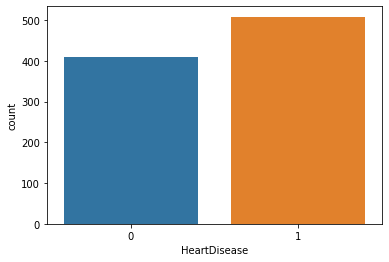

In [15]:
sns.countplot(x='HeartDisease',data=heart)

Number of Normal Heart Instances:

In [16]:
heart[heart['HeartDisease']==0]['HeartDisease'].describe().loc['count']

410.0

Number of Heart Failure Instances:

In [17]:
heart[heart['HeartDisease']==1]['HeartDisease'].describe().loc['count']

508.0

This seems like a fairly balanced problem and we can expect to do well across the precision, recall and accuracy categories in our classification report eventually after learning and predicting. 

Our model would only be slighty more sensitive to classification erroes for the '0' class than it would for the '1' class.

**Distribution of the Continuous Features.**

Let's identify the continous features:

In [18]:
info[info['FeatureType']=='Continuous']

,Description,FeatureType
Feature,,
Age,age of the patient [years],Continuous
RestingBP,resting blood pressure [mm Hg],Continuous
Cholesterol,serum cholesterol [mm/dl],Continuous
MaxHR,maximum heart rate achieved [Numeric value bet...,Continuous
Oldpeak,ST [Numeric value measured in depression],Continuous


**Age:**

<AxesSubplot:ylabel='Frequency'>

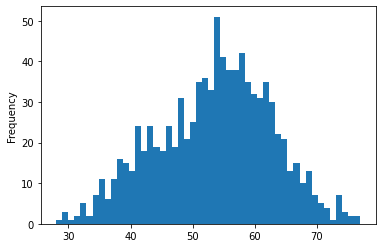

In [19]:
heart['Age'].plot(kind='hist',bins=50)

The data suggests quite a wide age net was cast. Perhaps, heart problems and failures are a condition across different ages. It does seem normally distributed, however, with a cluster/central tendency around age 55.

Let's see if heart failures are a common condition with certain age groups:

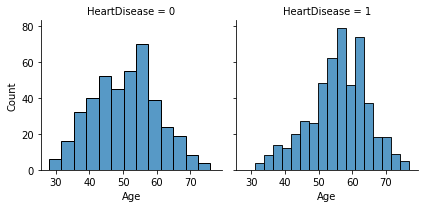

In [20]:
g = sns.FacetGrid(data=heart,col='HeartDisease')
g.map(sns.histplot,'Age')

It would seem (from the data) that heart conditions are pretty common across every identified age group in the dataset. Although more people between the ages of 50 - 65 are prone to suffer heart failures.

**Resting Blood Pressure:**

<AxesSubplot:ylabel='Frequency'>

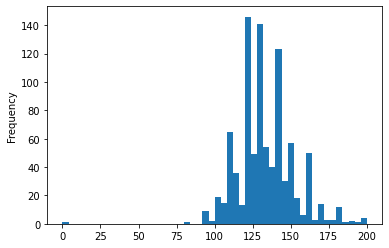

In [21]:
heart['RestingBP'].plot(kind='hist',bins=50)

Most people in the dataset have RBPs that fall between 100 and 175mmHg. There is one individual with a RestingBP of O though.

In [22]:
heart[heart['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


It turns out this person is a 55 year old male. It would require domain expertise (which we don't have right now) to determine if this a healthy/optimal RestingBP for a person of that age. Another possibility could be that his actual RBP wasn't recorded for this dataset considering his Cholesterol and FastingBS data is also set at 0. Ironically, he is labelled as having Heart Disease.

Let's explore any possible relationships between RestingBP and our label:

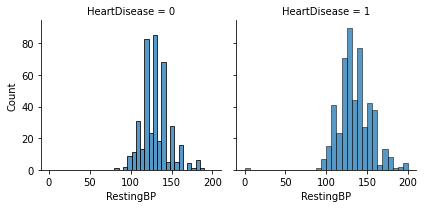

In [23]:
g = sns.FacetGrid(data=heart,col='HeartDisease')
g.map(sns.histplot,'RestingBP')

There are more people in this data set with RBPs between 100 and 150 suffering from heart disease than otherwise. However, it is also clear that RBP is not a reliable individual predictor or heart disease when you consider that quite a number of non-sufferers also have high RBPs.

**Cholesterol:**

<AxesSubplot:ylabel='Frequency'>

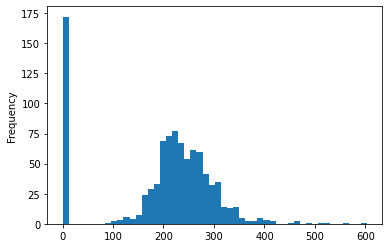

In [24]:
heart['Cholesterol'].plot(kind='hist',bins=50)

We find a high frequency of individuals in the dataset with 0 cholesterol levels.

In [25]:
heart[heart['Cholesterol']==0].count()

Age               172
Sex               172
ChestPainType     172
RestingBP         172
Cholesterol       172
FastingBS         172
RestingECG        172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
ST_Slope          172
HeartDisease      172
dtype: int64

There are 172 people with 0 cholesterol levels. To be sure that this is an oversight, let's explore a possible connection/relationship between cholesterol and heart disease. If we find that people with 0 cholesterol still suffer heart disease, we can conclude that this could be a recording error.

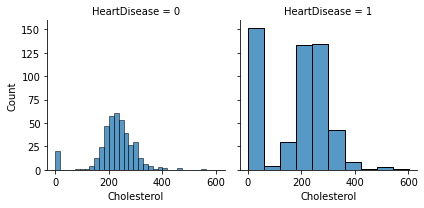

In [26]:
g = sns.FacetGrid(data=heart,col='HeartDisease')
g.map(sns.histplot,'Cholesterol')

There is a high occurence of heart disease amongst people with 0 cholesterol. Before writing it off, it would be best to consult some domain experts to confirm if this could be an observable phenomena/pattern in the real world.

To get a true sense of the connection between cholesterol and heart disease in the mean time, we might have to control for this 0 occurence by removing it from the dataset for this analysis.

In [27]:
heart_adj = heart[heart['Cholesterol'] > 0]

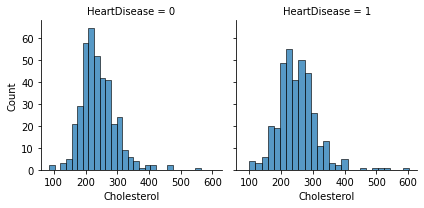

In [28]:
g = sns.FacetGrid(data=heart_adj,col='HeartDisease')
g.map(sns.histplot,'Cholesterol')

There's nothing remarkably different to notice here as both plots suggest no observable relationships between cholesterol levels and heart disease.

What we can note/study/acknowledge is the existence of outliers. i.e. sufferers with low levels of cholesterol and non-sufferers with high levels of cholesterol.

In [29]:
heart_adj[(heart_adj['HeartDisease']==0)].describe()['Cholesterol']

count    390.000000
mean     238.769231
std       55.394617
min       85.000000
25%      203.000000
50%      231.500000
75%      269.000000
max      564.000000
Name: Cholesterol, dtype: float64

In [30]:
heart_adj[(heart_adj['HeartDisease']==1)].describe()['Cholesterol']

count    356.000000
mean     251.061798
std       62.462713
min      100.000000
25%      212.000000
50%      246.000000
75%      283.250000
max      603.000000
Name: Cholesterol, dtype: float64

On average, we can conclude that individuals with heart disease have 13 mm/dl more cholesterol that individuals without heart disease. In the context of our previous plots, we can actually consider this difference negligible.

**Maximum Heart Rate:**

<AxesSubplot:ylabel='Frequency'>

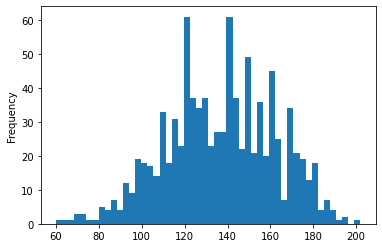

In [31]:
heart['MaxHR'].plot(kind='hist',bins=50)

The heart rate data seems well-spread with noticeable spikes around the round figures.

Let's examine it's connection to heart disease.

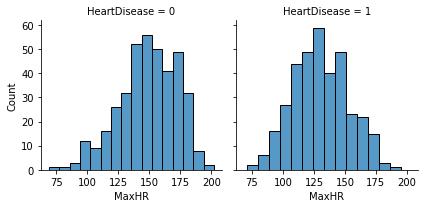

In [32]:
g = sns.FacetGrid(data=heart_adj,col='HeartDisease')
g.map(sns.histplot,'MaxHR')

Again, we find another feature offering no particular insight into a possible connection with heart disease.

**Let's examine correlations between the continuous features.**

In [33]:
info[info['FeatureType']=='Continuous']

,Description,FeatureType
Feature,,
Age,age of the patient [years],Continuous
RestingBP,resting blood pressure [mm Hg],Continuous
Cholesterol,serum cholesterol [mm/dl],Continuous
MaxHR,maximum heart rate achieved [Numeric value bet...,Continuous
Oldpeak,ST [Numeric value measured in depression],Continuous


<AxesSubplot:>

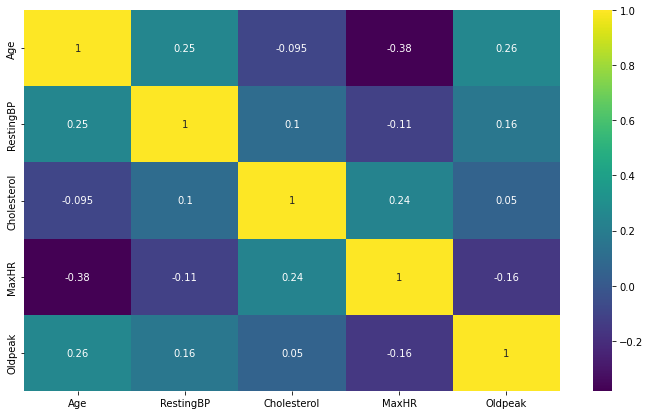

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(heart[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']].corr(),annot=True,cmap='viridis')

A few interesting correlations to take note of between our continous features - Age/RestingBP, MaxHR/Cholesterol, Age/OldPeak

**Categorical Features.**

In [35]:
info[info['FeatureType']=='Categorical']

,Description,FeatureType
Feature,,
Sex,"sex of the patient [M: Male, F: Female]",Categorical
ChestPainType,"chest pain type [TA: Typical Angina, ATA: Atyp...",Categorical
FastingBS,fasting blood sugar [1: if FastingBS > 120 mg/...,Categorical
RestingECG,resting electrocardiogram results [Normal: Nor...,Categorical
ExerciseAngina,"exercise-induced angina [Y: Yes, N: No]",Categorical
ST_Slope,the slope of the peak exercise ST segment [Up:...,Categorical
HeartDisease,"output class [1: heart disease, 0: Normal]",Categorical


Let's examine relationships between our categorical features and our label.

**Sex:**

<AxesSubplot:xlabel='Sex', ylabel='count'>

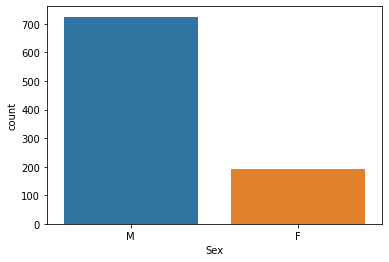

In [36]:
sns.countplot(x='Sex',data=heart)

In [37]:
heart.groupby('Sex')['HeartDisease'].count()/len(heart)

Sex
F    0.21024
M    0.78976
Name: HeartDisease, dtype: float64

Men account for about 80% of the dataset making this feature very unbalanced.

<AxesSubplot:xlabel='Sex', ylabel='count'>

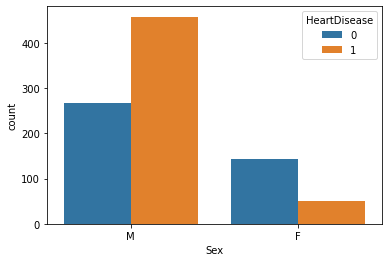

In [38]:
sns.countplot(x='Sex',data=heart,hue='HeartDisease')

Percentage of men without heart disease:

In [39]:
heart[(heart['Sex']=='M') & (heart['HeartDisease']==0)]['HeartDisease'].describe().loc['count'] / heart[(heart['Sex']=='M')]['HeartDisease'].describe().loc['count']

0.3682758620689655

Percentage of men with heart disease:

In [40]:
heart[(heart['Sex']=='M') & (heart['HeartDisease']==1)]['HeartDisease'].describe().loc['count'] / heart[(heart['Sex']=='M')]['HeartDisease'].describe().loc['count']

0.6317241379310344

Percentage of women without heart disease:

In [41]:
heart[(heart['Sex']=='F') & (heart['HeartDisease']==0)]['HeartDisease'].describe().loc['count'] / heart[(heart['Sex']=='F')]['HeartDisease'].describe().loc['count']

0.7409326424870466

Percentage of women with heart disease:

In [42]:
heart[(heart['Sex']=='F') & (heart['HeartDisease']==1)]['HeartDisease'].describe().loc['count'] / heart[(heart['Sex']=='F')]['HeartDisease'].describe().loc['count']

0.25906735751295334

Heart disease seems prevalent among men (63%) than women (26%). But it is important to note that Sex is an unbalanced feature here with men taking up a considerable share of the data so our inference might be unreliable.

**Chest Pain Type:**

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

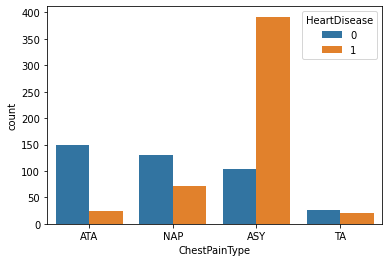

In [43]:
sns.countplot(x='ChestPainType',data=heart,hue='HeartDisease')

In [44]:
feat_info('ChestPainType')

chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]


There is a higher prevalence of heart disease with individuals who have the ASY (Asymptomatic) chest pain type. It is the only pain type category with more people who have the condition suffering heart disease than people without heart disease in the category. 

We can consider the ASY pain type a reliable indicator/predictor of heart disease.

This observation would require domain knowledge to investigate the connection between the ASY pain type and heart disease.

Another thing to note is heart disease doesn't tend to be common with individuals with the ATA (Atypical Angina) chest pain type.

Also, the TA (Typical Angina) pain type might not be a reliable indicator of heart disease.

**Fasting Blood Sugar:**

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

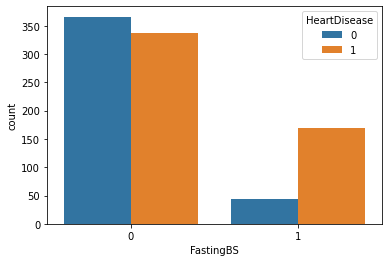

In [45]:
sns.countplot(x='FastingBS',data=heart,hue='HeartDisease')

In [46]:
feat_info('FastingBS')

fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]


The data suggests individuals with a FastingBS > 120 mg/dl are more prone to suffer heart disease. The findings aren't exactly conclusive on the heart disease implications for individuals with lower FBS levels.

**Resting ECG:**

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

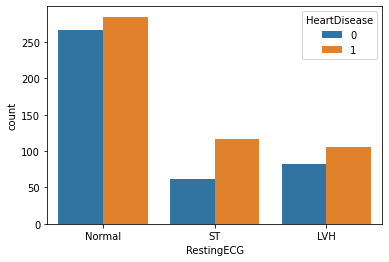

In [47]:
sns.countplot(x='RestingECG',data=heart,hue='HeartDisease')

In [48]:
feat_info('RestingECG')

resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


There isn't any particualar ECG result type that appears to be a strong indicator of heart disease judging from the countplot.

**Exercise Angina**:

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

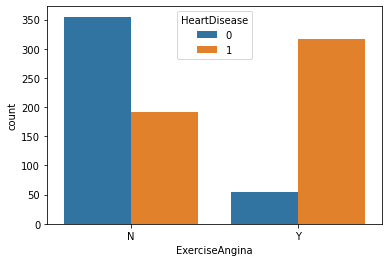

In [49]:
sns.countplot(x='ExerciseAngina',data=heart,hue='HeartDisease')

Exercise Angina seems to be a leading indicator/predictor of heart disease. However, we might need domain expertise to explain heart disease in individuals without exercise angina as evidenced in the plot.

## Section 2: Data Preprocessing

### Missing Data

**NOTE:** Dealing with missing data is typically nuanced and there isn't an absolute correct answer. Our options usually are to keep the missing data, drop the missing data, or fill in the missing data.

In [50]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Luckily for us, we have no features with missing data.

**BUT:** We do have to be mindful of the 0 occurrences/instances in the RestingBP, Cholesterol and FastingBS features and investigate (with the help of domain knowledge, of course) if this is a normal real-life occurence or the figures were erroneously recorded into the dataset.

Total number of RestingBP 0 instances:

In [51]:
heart[heart['RestingBP']==0]['HeartDisease'].describe().loc['count']

1.0

Total number of Cholesterol 0 instances:

In [52]:
heart[heart['Cholesterol']==0]['HeartDisease'].describe().loc['count']

172.0

Total number of FastingBS 0 instances:

In [53]:
heart[heart['FastingBS']==0]['HeartDisease'].describe().loc['count']

704.0

The number of 0 instances with Cholesterol and FastingBF are a considerable fraction of the entire dataset.

What we can do, in the meanwhile, is run two different models i.e. one with both Cholesterol and FastingBS features and one without. The goal would be to see if the absence of these features has a material effect on our classification results.

### String Categories and Dummy Variables

**Non-numeric Columns:**

In [54]:
heart.select_dtypes(['object']).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

We have to convert these features into dummy variable types our model can understand and work with.

**Sex:**

In [55]:
sex = pd.get_dummies(heart['Sex'],drop_first=True)

In [56]:
heart = pd.concat([heart.drop('Sex',axis=1),sex],axis=1)

In [57]:
heart = heart.rename(columns = {'M':'Male'})

**Chest Pain Type:**

In [58]:
chestpaintype = pd.get_dummies(heart['ChestPainType'],drop_first=True)

In [59]:
heart = pd.concat([heart,chestpaintype],axis=1)

**Resting ECG:**

In [60]:
ecg = pd.get_dummies(heart['RestingECG'],drop_first=True)

In [61]:
heart = pd.concat([heart,ecg],axis=1)

**Exercise Angina:**

In [62]:
e_a = pd.get_dummies(heart['ExerciseAngina'],drop_first=True)

In [63]:
heart = heart = pd.concat([heart,e_a],axis=1)

**ST Slope:**

In [64]:
s_t = pd.get_dummies(heart['ST_Slope'],drop_first=True)

In [65]:
heart = heart = pd.concat([heart,s_t],axis=1)

### Feature Engineering

The dataset doesn't exactly require any feature engineering as none of the features contains useful information or any information at all that could be separated out into a new feature/column by itself.

## Section 3: Machine Learning

### Train-Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
heart.select_dtypes(['object']).columns

Index(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [68]:
heart.columns

Index(['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Male', 'ATA', 'NAP', 'TA', 'Normal', 'ST', 'Y', 'Flat',
       'Up'],
      dtype='object')

In [69]:
X = heart.drop(['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease'],axis=1).values

In [70]:
y = heart['HeartDisease'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Data Normalisation

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
X_train = scaler.fit_transform(X_train)

In [75]:
X_test = scaler.transform(X_test)

**NOTE:** 

### Creating the Model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

A common rule of thumb is basing the number of neurons in our layers on the size of our actual feature data. 

In [77]:
X_train.shape

(642, 15)

We have 15 incoming features which is a good range for our number of neurons per layer.

To avoid overfitting, we'll adopt early stopping callback and add in dropout layers to stop the training based on our validation loss.

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [80]:
model = Sequential()

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

2022-10-01 23:16:49.286090: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We don't need to specify an epoch and batch size for the model considering the dataset is small.

In [81]:
model.fit(x=X_train,y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
21/21 [==============================] - 1s 8ms/step - loss: 0.6622 - val_loss: 0.6173
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 0.5888 - val_loss: 0.5507
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 0.5065 - val_loss: 0.4666
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 0.4193 - val_loss: 0.4150
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3671 - val_loss: 0.4030
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3494 - val_loss: 0.3996
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3399 - val_loss: 0.3924
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3324 - val_loss: 0.3919
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3290 - val_loss: 0.3939
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3243 - val_loss: 0.3915
Epoch 11/

### Prediction and Evaluation

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
predictions =  ((model.predict(X_test))>0.5).astype(int)

In [84]:
predictions[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [85]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 98  28]
 [ 16 134]]


              precision    recall  f1-score   support

           0       0.86      0.78      0.82       126
           1       0.83      0.89      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [86]:
zero_col_check = (heart[['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']] == 0)

In [87]:
zero_col_check.sum()

Age                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS         704
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak           368
ST_Slope            0
dtype: int64

To see how significant this missing values are, let's convert the series in terms of percentage of the entire dataset:

In [88]:
zero_col_check.sum()/len(heart)

Age               0.000000
ChestPainType     0.000000
RestingBP         0.001089
Cholesterol       0.187364
FastingBS         0.766885
RestingECG        0.000000
MaxHR             0.000000
ExerciseAngina    0.000000
Oldpeak           0.400871
ST_Slope          0.000000
dtype: float64

**Old Peak:**

We can safely ignore the 0 values in the Oldpeak feature because they represent no depression on the ST segment of the ECG which means no abnormalities.

Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/discussion/285525

**Resting BP:**

At just 0.11% of the entire dataframe with a single zero entry, it wouldn't make much of a difference changing the value. We can leave the row as is or delete it. Either way, it's fine.

We can try to fill in the missing values for the other features based off the averages of correlated columns and see if the model performs better this time. The problem with this method, however, is it's not exactly suited for this particular dataset. 

**Cholesterol:**

Let's find a column with a high correlation with Cholesterol.

In [89]:
heart[zero_cols].corr()['Cholesterol'].sort_values()

NameError: name 'zero_cols' is not defined

The MaxHR feature correlates the most with Cholesterol but there are 10 MaxHR figures with zero mean values for Cholesterol already. This clearly doesn't help our problem.

In [90]:
(heart.groupby('MaxHR').mean()['Cholesterol']==0).value_counts()

False    109
True      10
Name: Cholesterol, dtype: int64

**FastingBS:**

In [91]:
heart[zero_cols].corr()['FastingBS'].sort_values()

NameError: name 'zero_cols' is not defined

The Age feature correlates the most with FastingBS.

In [92]:
(heart.groupby('Age').mean()['FastingBS']==0).value_counts()

False    39
True     11
Name: FastingBS, dtype: int64

There are 11 Age figures with zero mean values for FastingBS. This also doesn't help our problem.

Let's try to fit the model again without these two features and see if the results are any different and possibly, even better. Remember that while Cholesterol showed no observable connection to heart disease earlier in the project, FastingBS showed a compelling connection to heart disease for individuals with levels exceeding 120 mg/dl.

In [93]:
heart.dtypes

Age                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
Male                uint8
ATA                 uint8
NAP                 uint8
TA                  uint8
Normal              uint8
ST                  uint8
Y                   uint8
Flat                uint8
Up                  uint8
dtype: object

In [94]:
X = heart.drop(['ChestPainType','Cholesterol','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'],axis=1).values

In [95]:
y = heart['HeartDisease'].values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [99]:
model = Sequential()

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(19,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [100]:
model.fit(x=X_train,y=y_train,epochs=250,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
21/21 [==============================] - 0s 6ms/step - loss: 0.6788 - val_loss: 0.6574
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 0.6244 - val_loss: 0.6045
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 0.5603 - val_loss: 0.5394
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 0.4805 - val_loss: 0.4714
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 0.4236 - val_loss: 0.4404
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3808 - val_loss: 0.4260
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3583 - val_loss: 0.4316
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3535 - val_loss: 0.4226
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3439 - val_loss: 0.4176
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 0.3416 - val_loss: 0.4167
Epoch 11/

In [101]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

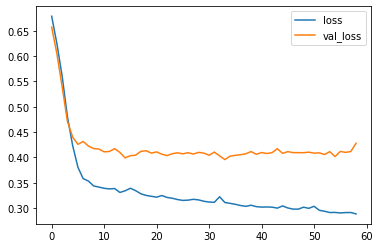

In [102]:
losses.plot()

In [103]:
predictions =  ((model.predict(X_test))>0.5).astype(int)

In [104]:
predictions[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [105]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[106  20]
 [ 29 121]]


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       126
           1       0.86      0.81      0.83       150

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



The performance this time isn't any starkly different from the previous one. There isn't much we're missing across every metric: precision, recall and accuracy. But it's best to keep both features in the model considering their importance in real world cases and their implications for diagnosis. We just excluded them here on a 'what-if' basis because they had a lot of missing values.

## Section 4: Conclusion

It is important that our model is efficient with f1-scores at leasr around the 90s considering it could be determining life and death outcomes for individuals in the real world. The cost of misdiagnosing the absence of heart failure where there is indeed one far outweigh the costs of misdiagnosing the presence of heart failure where there isn't one.

Some suggestions to improve the model would be filling in those zero values with actual readings and expanding the dataset to include more determining features (again, with the help of domain knowledge, of course).

## Thank You!